In [1]:
import pandas as pd
import wordcloud as WordCloud

In [2]:
## Load the Data
df = pd.read_csv('.\..\Data\Finalized_DataFrame_All_Data_Anonymized.csv')

In [3]:
df['Tweet_Cleaned'] = df['Tweet'].str.replace("[^a-zA-Z#]"," ")

In [4]:
df["clean_tweet"] = df['Tweet_Cleaned'].apply(lambda x: " ".join([w for w in x.split() if len(w) >3]))

## III. Preprocessing and Modeling

In [5]:
simp = df[['Team','Result','clean_tweet']]

In [6]:
simp.sample(3)

,Team,Result,clean_tweet
299328,Tottenham,0,Sama westbrom kalah sama brighton kalah sama h...
106168,Tottenham,1,SpursOfficial GlennHoddle Hope relegated
66994,Arsenal,1,Lordbass AnelkaMaduka ESPNUK ESPNFC Arsenal


## IV. Conclusions

In [7]:
tokenized_tweet = simp['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [seem, find, serious, buyers, tonight, game, g...
1    [Gabsus, solusi, masalah, striker, Arsenal, ht...
2    [estuvodemas, delprado, agus, jachaci, DiarioO...
3    [Payah, yang, ngancem, Jadi, maen, lawan, Arse...
4    [this, happens, arsenal, back, https, SLMr, EZ...
Name: clean_tweet, dtype: object

In [8]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(word) for word in x])

In [9]:
tokenized_tweet.head()

0    [seem, find, seriou, buyer, tonight, game, go,...
1    [gabsu, solusi, masalah, striker, arsen, http,...
2    [estuvodema, delprado, agu, jachaci, diariool,...
3    [payah, yang, ngancem, jadi, maen, lawan, arse...
4        [thi, happen, arsen, back, http, slmr, eztnb]
Name: clean_tweet, dtype: object

In [10]:
## combine wordsinto single sentence:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
simp['clean_tweet'] = tokenized_tweet
simp.head()

C:\Users\benja\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Team,Result,clean_tweet
0,Arsenal,1,seem find seriou buyer tonight game go give aw...
1,Arsenal,1,gabsu solusi masalah striker arsen http kyqk
2,Arsenal,1,estuvodema delprado agu jachaci diariool agreg...
3,Arsenal,1,payah yang ngancem jadi maen lawan arsen http ...
4,Arsenal,1,thi happen arsen back http slmr eztnb


## Exploratory Data Analysis 

In [11]:
from wordcloud import WordCloud

all_words = " ".join([sentence for sentence in simp['clean_tweet']])

wordcloud = WordCloud(width =800, height = 500,
                      random_state = 42, max_font_size=100).generate(all_words)

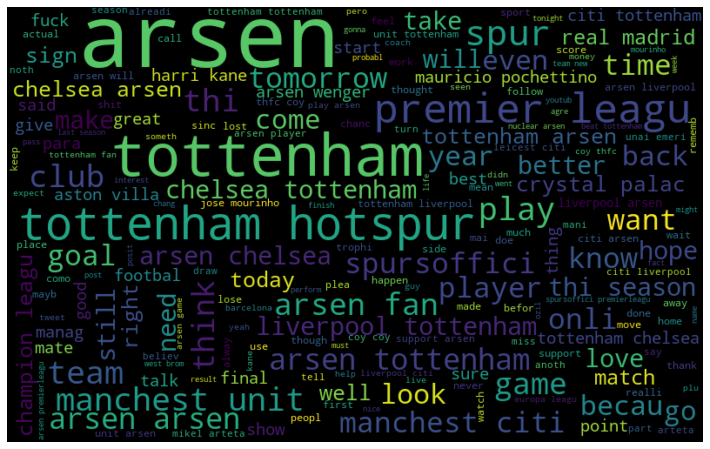

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()
plt.savefig('.\..\images\itokenize_wordcloud.png')

## frequent words when there are wins

In [13]:
## frequent words when there are wins
all_words_wins = " ".join([sentence for sentence in simp['clean_tweet'][simp['Result'] == 1]])

wordcloud_wins = WordCloud(width =800, height = 500,
                      random_state = 42, max_font_size=100).generate(all_words_wins)

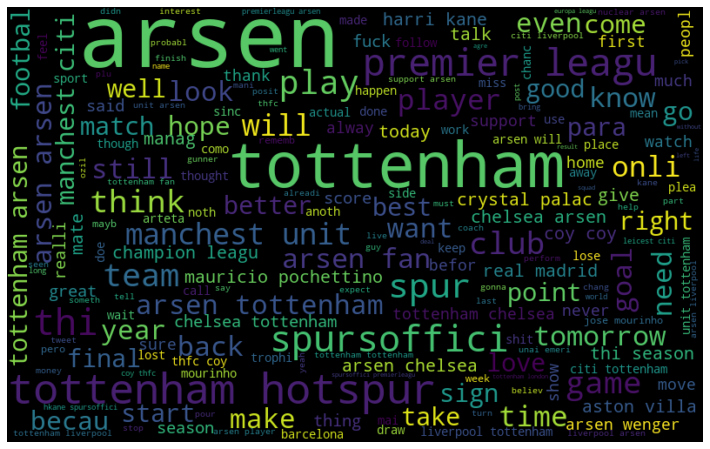

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_wins, interpolation ='bilinear')
plt.axis('off')
plt.show()
plt.savefig('.\..\images\itokenize_wordcloud_wins.png')

## frequent words when there are losses and ties

In [15]:
## frequent words when there are wins
all_words_losstie = " ".join([sentence for sentence in simp['clean_tweet'][simp['Result'] == 0]])

wordcloud_losstie = WordCloud(width =800, height = 500,
                      random_state = 42, max_font_size=100).generate(all_words_losstie)

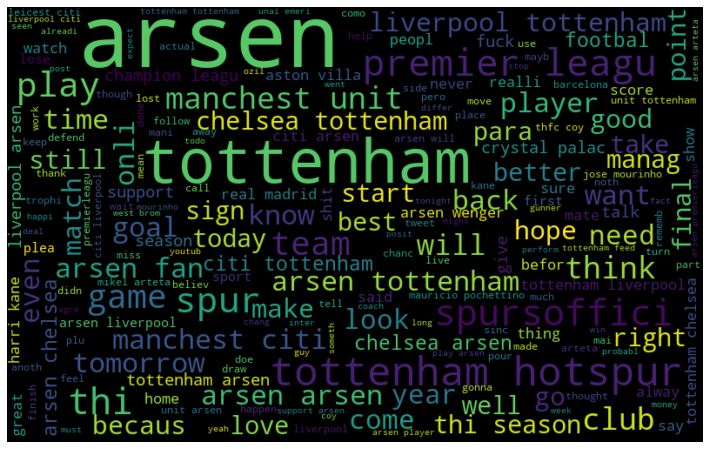

In [16]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_losstie, interpolation ='bilinear')
plt.axis('off')
plt.show()
#plt.savefig('.\..\images\itokenize_wordcloud_losstie.png')

In [17]:
# extract the hashtag 
import re
def hashtag_extract(tweets):
    hashtags = []
    #loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [18]:
# extract hashtags from positive results
ht_positive = hashtag_extract(df['clean_tweet'][df['Result']==1])
# extract hashtags negative results 
ht_negative = hashtag_extract(df['clean_tweet'][df['Result']==0])

In [19]:
## unnest list 
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [ ]:
import nltk
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                  'Count':list(freq.values())})
d.head()